# Module 09: *k*-Nearest Neighbors

**Student Name**: Regina Rabkina

**Date**: 11/5/23

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Performing the following:
1. Load and Inspect the data

2. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

3. Evaluate the prediction accuracy of the k-nn model.

4. Explore different metrics and data partitioning strategies.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Part 1: Inspect the data
Loading the data, inspecting the distribution and pairwise relationships between the features. 

In [2]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [3]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]
print(df.columns)


Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')


### Part 1.1 
Observations about the iris flowers using statistical summary.

In [4]:
summary = df.describe().round(2)
print(summary)

       sepal length  sepal width  petal length  petal width
count        150.00       150.00        150.00       150.00
mean           5.84         3.06          3.76         1.20
std            0.83         0.44          1.77         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50


#### Sepal Length:

Count: There are 150 data points for sepal length, indicating that all measurements are available.

Mean: The average sepal length is approximately 5.84 cm, suggesting that most Iris flowers have sepal lengths around this value.

Std: The standard deviation of about 0.83 cm indicates that the sepal lengths vary by around 0.83 cm from the mean.

Min: The smallest sepal length in the dataset is 4.30 cm.

25% (Q1): 25% of the sepal lengths are 5.10 cm or less.

Median (50% or Q2): The middle sepal length is approximately 5.80 cm.

75% (Q3): 75% of the sepal lengths are 6.40 cm or less.

Max: The largest sepal length in the dataset is 7.90 cm.


#### Sepal Width:

Count: There are 150 data points for sepal width, indicating no missing values.

Mean: The average sepal width is approximately 3.06 cm.

Std: The standard deviation of about 0.44 cm suggests that sepal widths vary less than sepal lengths.

Min: The smallest sepal width in the dataset is 2.00 cm.

25% (Q1): 25% of sepal widths are 2.80 cm or less.

Median (50% or Q2): The middle sepal width is approximately 3.00 cm.

75% (Q3): 75% of sepal widths are 3.30 cm or less.

Max: The largest sepal width in the dataset is 4.40 cm.


#### Petal Length:

Count: There are 150 data points for petal length, indicating no missing values.

Mean: The average petal length is approximately 3.76 cm.

Std: The standard deviation of about 1.77 cm indicates significant variability in petal lengths.

Min: The smallest petal length in the dataset is 1.00 cm.

25% (Q1): 25% of petal lengths are 1.60 cm or less.

Median (50% or Q2): The middle petal length is approximately 4.35 cm.

75% (Q3): 75% of petal lengths are 5.10 cm or less.

Max: The largest petal length in the dataset is 6.90 cm.


#### Petal Width:

Count: There are 150 data points for petal width, indicating no missing values.

Mean: The average petal width is approximately 1.20 cm.

Std: The standard deviation of about 0.76 cm suggests moderate variability in petal widths.

Min: The smallest petal width in the dataset is 0.10 cm.

25% (Q1): 25% of petal widths are 0.30 cm or less.

Median (50% or Q2): The middle petal width is approximately 1.30 cm.

75% (Q3): 75% of petal widths are 1.80 cm or less.

Max: The largest petal width in the dataset is 2.50 cm.


### Part 1.2
Visualizing and discussing the distribution of each feature and the pairwise relationships between features.

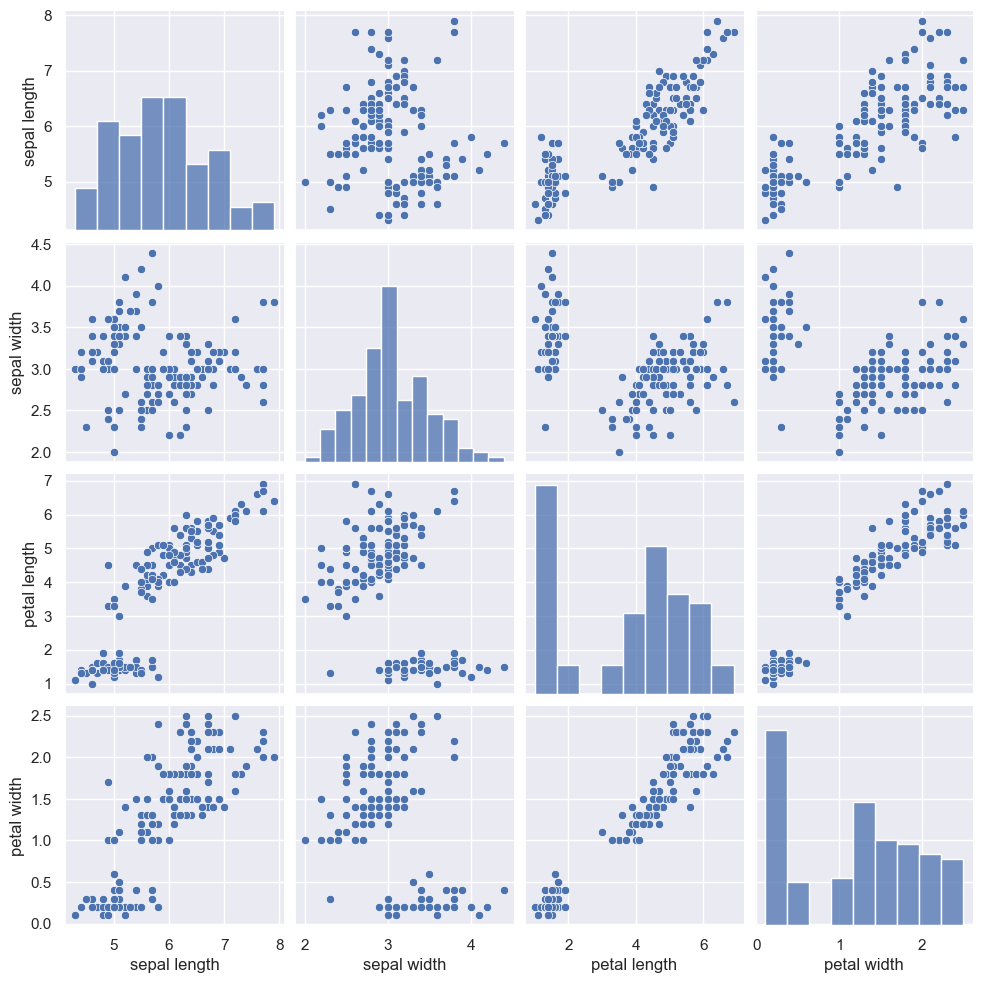

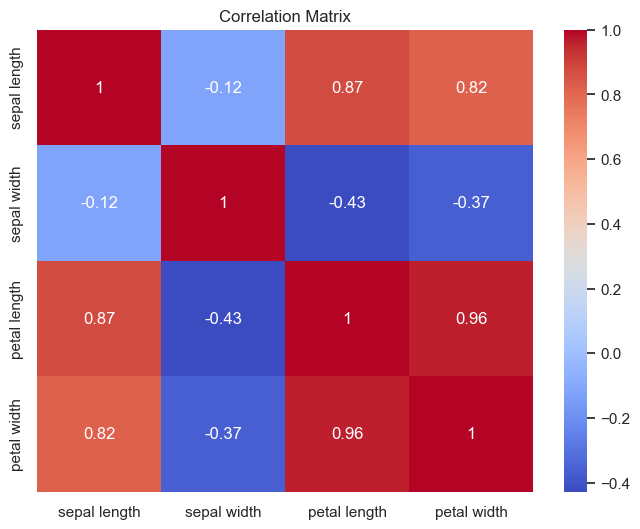

In [5]:
#creates pairplot & visualizes feature distributions and pairwise relationships
sns.pairplot(df)
plt.show()

#creates and visualizes correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Looking at the diagonal of the pairplot and correlation matrix, we can observe the distribution of each feature for each species of Iris. 

1) Starting with sepal length, there seems to be a higher concentration around 6 cm. The histogram show a roughly normal distribution, with a moderate spread of values with some variability around 5 and 8 cm.

2) Sepal with has a central tendency around 3 cm, but there is a tail towards higher values. It is skewed slightly to the right.

3) Petal length has a bimodal distribution in its histogram, with two clear peaks. One peak is around 1 cm and the other is around 5 cm.

4) Petal with also has a bimodal distribution in its histogram, with one peak around 0-0.5cm and the other around 1.5 cm.

Sepal length and petal width show a positive linear relationship, indicating that as one increases, so does the other. They also have a strong positive correlation with a correlation coefficient of around 0.82. 

Sepal length and petal length have a positive linear relationship as well, with a strong correlation coefficient of around 0.87.

Sepal length and sepal width have a weak negative correlation, with a correlation coefficient of around -0.12.

Sepal width and petal width also have a rather weak negative correlation, with a correlation coefficient of around -0.37.

Sepal width and petal length have a relatively stronger negative correlation, with a correlation coefficient of around -0.43.

Petal length and petal width have a very strong positive correlation, with a correlation coefficient around 0.96. They display a strong positive linear relationship.


## Part 2: Choose *K*

Building a model to predict the target in the iris dataset using the k-NN algorithm. Trying at least 20 different values of k and evaluating the accuracy of the predictions. 

Lastly, displaying a line graph showing the accuracy for each value of k and evaluating the results from the graph to recommend the best value of k.

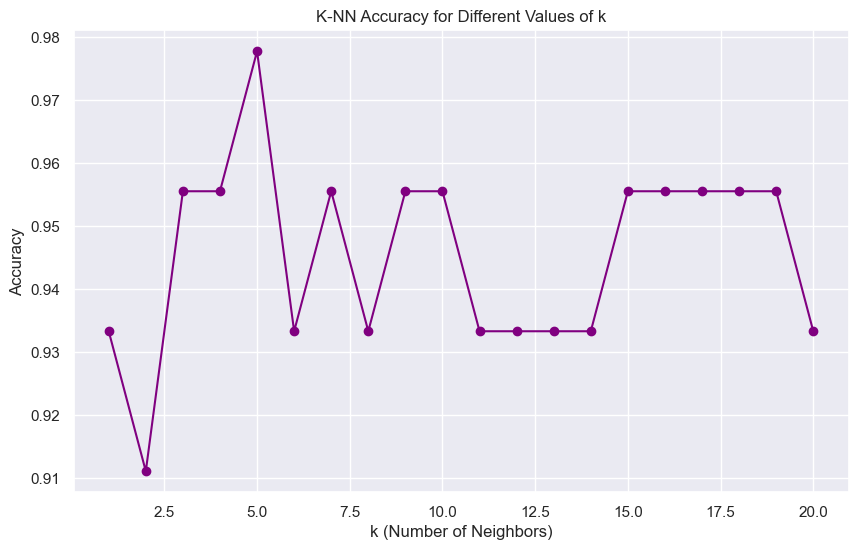

The best value of k is 5 with an accuracy of 0.98.


In [6]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    # TODO: Enter your data and ensure reproducibility and stratified sampling
    X, y, test_size=0.3, random_state=42, stratify=y
)

#initialize variables to store accuracy values
k_values = []
accuracies = []

#experiments with different values of k
for k in range(1, 21):  #try values of k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k) #initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    k_values.append(k)
    accuracies.append(accuracy)

#creates a line graph to visualize accuracy for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='purple')
plt.title('K-NN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

#evaluates the results and recommends the best value of k
best_k = k_values[np.argmax(accuracies)]
print(f"The best value of k is {best_k} with an accuracy of {max(accuracies):.2f}.")



As shown above, the best value of k recommended is 5. As the value of k increases, the overall accuracy initially increases to the highest accuracy at 98% and then fluctuates between 0.93 and 0.96.

## Part 3: Evaluate the Results
Displaying the classification report for the recommended value of k. Evaluating the report and explaining the results. 

In [7]:
#get the classification report for the best value of k
knn = KNeighborsClassifier(n_neighbors=5) #initialize the classifier and set the number of neighbors
knn.fit(X_train, y_train)

#makes predictions on the test data
y_pred = knn.predict(X_test)

target_names = ['class 0', 'class 1', 'class 2']

#displays the classification report
report = classification_report(y_test, y_pred, target_names=target_names)

#prints the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        15
     class 1       0.94      1.00      0.97        15
     class 2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Precision:
Class 0: Precision is 1.00, which means all instances predicted as class 0 were indeed class 0.
Class 1: Precision is 0.94, indicating that 94% of the instances predicted as class 1 were correctly classified.
Class 2: Precision is 1.00, indicating that all instances predicted as class 2 were correctly classified.

Recall: 
Class 0: Recall is 1.00, indicating that all actual class 0 instances were correctly predicted.
Class 1: Recall is 1.00, indicating that all actual class 1 instances were correctly predicted.
Class 2: Recall is 0.93, suggesting that 93% of the actual class 2 instances were correctly predicted.

F1-Score: 
Class 0: F1-score is 1.00, indicating a perfect balance between precision and recall.
Class 1: F1-score is 0.97, suggesting a strong balance between precision and recall.
Class 2: F1-score is 0.97, indicating a good balance between precision and recall.

Support: In this report, each class has 15 samples.

Accuracy(ratio of correctly classified instances to the total number of instances): In this report, the model has an accuracy of 0.98, or 98%.

Macro Average: This is the unweighted average of precision, recall, and F1-score across all classes. In this report, the macro average is 0.98.

Weighted Average: This is the weighted average of precision, recall, and F1-score, where the weights are determined by the number of samples in each class. In this report, the weighted average is 0.98.

Ultimately, the classification report indicates that the K-NN model with k=5 performs well. It has high precision, recall, and F1-scores for all three classes, and the overall accuracy of 98% is very good. 

## Part 4: Model Evaluation
Researching the difference between accuracy, precision, and recall, providing examples for each metric.

Identifying another approach that can be used to partition the dataset.

### 4.1
1) Accuracy: a metric that measures how often a machine learning model correctly predicts the outcome.
* Formula: Accuracy = (Correct predicitons)/(All predictions)
* Example: You would use accuracy when you want an overall assessment of the model's performance on a balanced dataset. It's more suitable for problems where false positives and false negatives carry equal importance. We can use accuracy when determining if an email is spam or not in a dataset with a similar number of spam and non-spam emails.

2) Precision: a metric that measures how often a machine learning model correctly predicts the positive class.
* Formula: Precision = (True Positives)/(True Positives + False Positives)
* Example: You would use precision when you want to minimize the rate of false positive errors. In cases like YouTube recommendations, minimizing false positives is significant. False positives represent videos that users dislike but are recommended. False negatives are of lower concern as recommendations should align with user preferences. High precision is essential for automated marketing campaigns to maximize user engagement and interest.

3) Recall: a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset.
* Formula: Recall = (True Positives)/(True Positives + False Negatives)
* Example: You would use recall when you want to minimize the rate of false negative errors. In the context of COVID-19 detection, preventing false negatives is crucial due to the ease of disease transmission. We want to ensure that COVID-positive patients are not incorrectly assessed as disease-free to prevent further spread. False positives (healthy patients labeled as positive) are less concerning in this scenario. For high-risk disease detection, such as cancer, prioritizing recall is vital.

### 4.2
An alternative approach that can be used to partition a dataset is the k-fold Cross-Validation method. 

How it works: 
1) The dataset is shuffled randomly.
2) The dataset is split into k groups
3) For each unique group:
* Take the group as a hold out or test dataset
* Take the remaining groups as a training dataset
* Fit a model on the training set and evaluate it on the test set
* Retain the evaluation score and discard the model
4) Summarize the skill of the model using the sample of model evaluation scores

This method provides a more robust evaluation of the model's performance and utilizies the entire dataset for training and testing.

## Resources / References
Share any resources that were helpful in your response for question 4.

Q3: https://thecleverprogrammer.com/2021/07/07/classification-report-in-machine-learning/

Q4: https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Accuracy%20shows%20how%20often%20a,when%20choosing%20the%20suitable%20metric.

https://www.v7labs.com/blog/precision-vs-recall-guide

https://machinelearningmastery.com/k-fold-cross-validation/